# How many gene promoters are within TAD boundaries (any overlap counts)

In [8]:
cd ../az_mrg

/scratch/ak8725/az_mrg


In [52]:
wc -l /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs13_out/az_5kb_boundaries.bed

3966 /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs13_out/az_5kb_boundaries.bed


In [47]:
wc -l /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs1_out/az_2kb_boundaries.bed

6432 /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs1_out/az_2kb_boundaries.bed


In [49]:
wc -l /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs2_out/az_1kb_boundaries.bed

4662 /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs2_out/az_1kb_boundaries.bed


In [60]:
head azucena_genes.bed

chr01	2325	10183	gene:OsAzu_01g0000010	+
chr01	10736	11801	gene:OsAzu_01g0000020	+
chr01	10737	11793	gene:OsAzu_01g0000030	-
chr01	12076	15281	gene:OsAzu_01g0000040	+
chr01	15657	19273	gene:OsAzu_01g0000050	+
chr01	22199	26348	gene:OsAzu_01g0000060	+
chr01	26494	28061	gene:OsAzu_01g0000070	+
chr01	29224	33894	gene:OsAzu_01g0000080	+
chr01	35014	40593	gene:OsAzu_01g0000090	+
chr01	56572	57695	gene:OsAzu_01g0000100	+


In [65]:
awk '{if ($5 == "+") print $1, $2-1000, $2, $4; else if ($5 == "-") print $1, $3, $3+1000, $4;}' azucena_genes.bed > azucena_1kb_promoter.bed


In [5]:
module load bedtools/intel/2.29.2

In [70]:
head azucena_1kb_promoter.bed

chr01	1325	2325	gene:OsAzu_01g0000010
chr01	9736	10736	gene:OsAzu_01g0000020
chr01	11793	12793	gene:OsAzu_01g0000030
chr01	11076	12076	gene:OsAzu_01g0000040
chr01	14657	15657	gene:OsAzu_01g0000050
chr01	21199	22199	gene:OsAzu_01g0000060
chr01	25494	26494	gene:OsAzu_01g0000070
chr01	28224	29224	gene:OsAzu_01g0000080
chr01	34014	35014	gene:OsAzu_01g0000090
chr01	55572	56572	gene:OsAzu_01g0000100


In [69]:
sed -i 's/ \+/\t/g' azucena_1kb_promoter.bed

In [6]:
bedtools intersect -a boundaries_5kb_two_tools_intersect_80.bed -b azucena_1kb_promoter.bed -wo > promoters_at_5kb_boundaries_two_tools.bed

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	50143	51143	gene:OsAzu_10g0000010

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	50143	51143	gene:OsAzu_10g0000010



In [7]:
wc -l boundaries_5kb_two_tools_intersect_80.bed

2414 boundaries_5kb_two_tools_intersect_80.bed


In [119]:
head promoters_at_5kb_boundaries_two_tools.bed

chr01	82500	87500	chr01	83753	84753	gene:OsAzu_01g0000160	1000
chr01	127500	132500	chr01	128827	129827	gene:OsAzu_01g0000220	1000
chr01	127500	132500	chr01	131297	132297	gene:OsAzu_01g0000230	1000
chr01	127500	132500	chr01	128827	129827	gene:OsAzu_01g0000220	1000
chr01	127500	132500	chr01	131297	132297	gene:OsAzu_01g0000230	1000
chr01	192500	197500	chr01	193862	194862	gene:OsAzu_01g0000320	1000
chr01	192500	197500	chr01	193026	194026	gene:OsAzu_01g0000330	1000
chr01	192500	197500	chr01	193862	194862	gene:OsAzu_01g0000320	1000
chr01	192500	197500	chr01	193026	194026	gene:OsAzu_01g0000330	1000
chr01	277500	282500	chr01	276981	277981	gene:OsAzu_01g0000430	481


In [6]:
#how many boundaries have an overlap with promoters
bed_file = "/scratch/ak8725/az_mrg/promoters_at_1kb_boundaries.bed"

groups = set()

with open(bed_file, "r") as f:
    for line in f:
        fields = line.strip().split("\t")
        group = (fields[0], fields[1], fields[2])
        groups.add(group)

print("Number of unique boundaries with promoter overlap: {}".format(len(groups)))


Number of unique boundaries with promoter overlap: 2123


In [120]:
awk '{if($NF!=0) print $7"\t"$8}' promoters_at_5kb_boundaries_two_tools.bed > promoters_at_5kb_boundaries_two_tools_list.bed

In [121]:
head promoters_at_5kb_boundaries_two_tools_list.bed

gene:OsAzu_01g0000160	1000
gene:OsAzu_01g0000220	1000
gene:OsAzu_01g0000230	1000
gene:OsAzu_01g0000220	1000
gene:OsAzu_01g0000230	1000
gene:OsAzu_01g0000320	1000
gene:OsAzu_01g0000330	1000
gene:OsAzu_01g0000320	1000
gene:OsAzu_01g0000330	1000
gene:OsAzu_01g0000430	481


In [122]:
#how many unique gene promoters
cut -f 1 promoters_at_5kb_boundaries_two_tools_list.bed | sort -u | wc -l

1921


In [123]:
wc -l promoters_at_5kb_boundaries_two_tools_list.bed 

2574 promoters_at_5kb_boundaries_two_tools_list.bed


In [74]:
head /scratch/ak8725/az_mrg/promoters_at_2kb_boundaries.bed

chr01	25000	27000	B00013	0.119082992172	.	chr01	25494	26494	gene:OsAzu_01g0000070	1000
chr01	83000	85000	B00039	0.190560036493	.	chr01	83753	84753	gene:OsAzu_01g0000160	1000
chr01	131000	133000	B00057	-0.037365019428	.	chr01	131297	132297	gene:OsAzu_01g0000230	1000
chr01	193000	195000	B00087	-0.068749395638	.	chr01	193862	194862	gene:OsAzu_01g0000320	1000
chr01	193000	195000	B00087	-0.068749395638	.	chr01	193026	194026	gene:OsAzu_01g0000330	1000
chr01	211000	213000	B00096	-0.074163146466	.	chr01	210091	211091	gene:OsAzu_01g0000360	91
chr01	405000	407000	B00189	0.005657691068	.	chr01	405486	406486	gene:OsAzu_01g0000610	1000
chr01	405000	407000	B00189	0.005657691068	.	chr01	406527	407527	gene:OsAzu_01g0000620	473
chr01	507000	509000	B00234	-0.273921213995	.	chr01	508373	509373	gene:OsAzu_01g0000740	627
chr01	581000	583000	B00271	-0.220311395381	.	chr01	582256	583256	gene:OsAzu_01g0000890	744


In [93]:
awk '{if($NF!=0) print $10"\t"$11}' promoters_at_2kb_boundaries.bed > promoters_at_2kb_boundaries_list.bed

In [94]:
cut -f 1 promoters_at_2kb_boundaries_list.bed | sort -u | wc -l

3723


In [150]:
head promoters_at_2kb_boundaries_list.bed

gene:OsAzu_01g0000070	1000
gene:OsAzu_01g0000160	1000
gene:OsAzu_01g0000230	1000
gene:OsAzu_01g0000320	1000
gene:OsAzu_01g0000330	1000
gene:OsAzu_01g0000360	91
gene:OsAzu_01g0000610	1000
gene:OsAzu_01g0000620	473
gene:OsAzu_01g0000740	627
gene:OsAzu_01g0000890	744


In [146]:
head /scratch/ak8725/az_mrg/promoters_at_5kb_boundaries_two_tools.bed

chr01	82500	87500	chr01	83753	84753	gene:OsAzu_01g0000160	1000
chr01	127500	132500	chr01	128827	129827	gene:OsAzu_01g0000220	1000
chr01	127500	132500	chr01	131297	132297	gene:OsAzu_01g0000230	1000
chr01	127500	132500	chr01	128827	129827	gene:OsAzu_01g0000220	1000
chr01	127500	132500	chr01	131297	132297	gene:OsAzu_01g0000230	1000
chr01	192500	197500	chr01	193862	194862	gene:OsAzu_01g0000320	1000
chr01	192500	197500	chr01	193026	194026	gene:OsAzu_01g0000330	1000
chr01	192500	197500	chr01	193862	194862	gene:OsAzu_01g0000320	1000
chr01	192500	197500	chr01	193026	194026	gene:OsAzu_01g0000330	1000
chr01	277500	282500	chr01	276981	277981	gene:OsAzu_01g0000430	481


In [96]:
awk '{if($NF!=0) print $10"\t"$11}' promoters_at_5kb_boundaries.bed > promoters_at_5kb_boundaries_list.bed

In [97]:
cut -f 1 promoters_at_5kb_boundaries_list.bed | sort -u | wc -l

3899


In [99]:
wc -l promoters_at_5kb_boundaries_list.bed

3899 promoters_at_5kb_boundaries_list.bed


In [128]:
#how many promoters are entirely within boundary (intersection = 1000)
awk '$NF==1000{count++} END{print count}' promoters_at_5kb_boundaries_two_tools.bed

1861


In [149]:
#how many unique gene promoters are entirely within boundary (intersection = 1000)
awk '$NF == 1000 {print $7}' promoters_at_5kb_boundaries_two_tools.bed | sort -u | wc -l

1380


In [ ]:
#extracting gene names for GO term enrichment analysis with RGI


In [152]:
head  promoters_at_5kb_boundaries.bed

chr01	82500	87500	B00016	-0.007672963698	.	chr01	83753	84753	gene:OsAzu_01g0000160	1000
chr01	127500	132500	B00022	-0.377922725545	.	chr01	128827	129827	gene:OsAzu_01g0000220	1000
chr01	127500	132500	B00022	-0.377922725545	.	chr01	131297	132297	gene:OsAzu_01g0000230	1000
chr01	192500	197500	B00035	-0.218382684448	.	chr01	193862	194862	gene:OsAzu_01g0000320	1000
chr01	192500	197500	B00035	-0.218382684448	.	chr01	193026	194026	gene:OsAzu_01g0000330	1000
chr01	277500	282500	B00051	-0.276713853333	.	chr01	276981	277981	gene:OsAzu_01g0000430	481
chr01	402500	407500	B00076	-0.115406958244	.	chr01	405486	406486	gene:OsAzu_01g0000610	1000
chr01	402500	407500	B00076	-0.115406958244	.	chr01	406527	407527	gene:OsAzu_01g0000620	973
chr01	507500	512500	B00095	-0.459206610974	.	chr01	508373	509373	gene:OsAzu_01g0000740	1000
chr01	622500	627500	B00118	-0.550562843776	.	chr01	624040	625040	gene:OsAzu_01g0000960	1000


In [161]:
awk '{print $10}' promoters_at_5kb_boundaries.bed | sort | uniq > promoters_at_5kb_boundaries_GO.txt

In [163]:
wc -l promoters_at_5kb_boundaries_GO.txt

3899 promoters_at_5kb_boundaries_GO.txt


In [164]:
awk '{print $10}' promoters_at_2kb_boundaries.bed | sort | uniq > promoters_at_2kb_boundaries_GO.txt

In [166]:
awk '{print $10}' promoters_at_1kb_boundaries.bed | sort | uniq > promoters_at_1kb_boundaries_GO.txt

In [168]:
awk '{print $7}' promoters_at_5kb_boundaries_two_tools.bed | sort | uniq > promoters_at_5kb_boundaries_two_tools_GO.txt

In [176]:
wc -l promoters_at_2kb_boundaries_two_tools_GO.txt

2206 promoters_at_2kb_boundaries_two_tools_GO.txt


In [172]:
awk '{print $7}' promoters_at_2kb_boundaries_two_tools.bed | sort | uniq > promoters_at_2kb_boundaries_two_tools_GO.txt

In [ ]:
#lists of gene names which promoters overlap boundaries
/scratch/ak8725/az_mrg/promoters_at_2kb_boundaries_GO.txt
/scratch/ak8725/az_mrg/promoters_at_1kb_boundaries_GO.txt
/scratch/ak8725/az_mrg/promoters_at_2kb_boundaries_two_tools_GO.txt
/scratch/ak8725/az_mrg/promoters_at_5kb_boundaries_two_tools_GO.txt

## Quantifying Promoter Overlap with Genomic Regions  Randomly Designated as Boundaries

In [7]:
module load bedtools/intel/2.29.2

SyntaxError: invalid syntax (<ipython-input-7-8c88a6a4bf5f>, line 1)

In [185]:
#finding random TAD boundaries in the genome
bedtools shuffle -i boundaries_2kb_two_tools_intersect_80.bed -g azucena.chrom.sizes_TRUE -noOverlapping > random_2kb_boundaries_two_tools.bed

In [181]:
head random_1kb_boundaries.bed

chr01	281831	282831	B00065	0.118303686824	.
chr04	18636394	18637394	B00077	-0.220582454764	.
chr03	1253610	1254610	B00151	0.068491605502	.
chr03	4163011	4164011	B00222	0.111921474297	.
chr04	21468188	21469188	B00270	-0.130352591732	.
chr08	5214192	5215192	B00284	0.025218289872	.
chr07	20527167	20528167	B00386	-0.126028470159	.
chr03	21128720	21129720	B00418	-0.191001059176	.
chr02	26541339	26542339	B00434	-0.203591428374	.
chr06	249207	250207	B00445	-0.072317785790	.


In [187]:
#all random boundaries files
wc -l random_1kb_boundaries.bed
wc -l random_2kb_boundaries.bed
wc -l random_5kb_boundaries.bed
wc -l random_2kb_boundaries_two_tools.bed
wc -l random_5kb_boundaries_two_tools.bed

4662 random_1kb_boundaries.bed
6432 random_2kb_boundaries.bed
3966 random_5kb_boundaries.bed
4948 random_2kb_boundaries_two_tools.bed
2414 random_5kb_boundaries_two_tools.bed


In [186]:
#finding 1kb promoters that overlap with random boundaries (any overlap counts)
bedtools intersect -a random_1kb_boundaries.bed -b azucena_1kb_promoter.bed -wo > promoters_at_random_1kb_boundaries.bed
bedtools intersect -a random_2kb_boundaries.bed -b azucena_1kb_promoter.bed -wo > promoters_at_random_2kb_boundaries.bed
bedtools intersect -a random_5kb_boundaries.bed -b azucena_1kb_promoter.bed -wo > promoters_at_random_5kb_boundaries.bed
bedtools intersect -a random_2kb_boundaries_two_tools.bed -b azucena_1kb_promoter.bed -wo > promoters_at_random_2kb_boundaries_two_tools.bed
bedtools intersect -a random_5kb_boundaries_two_tools.bed -b azucena_1kb_promoter.bed -wo > promoters_at_random_5kb_boundaries_two_tools.bed

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	50143	51143	gene:OsAzu_10g0000010

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	50143	51143	gene:OsAzu_10g0000010

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	50143	51143	gene:OsAzu_10g0000010

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	50143	51143	gene:OsAzu_10g0000010

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	50143	51143	gene:OsAzu_10g0000010

***** WARNING: File azucena_1kb_promoter.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	501

In [13]:
#how many random boundaries have an overlap with promoters
bed_file = "/scratch/ak8725/az_mrg/promoters_at_random_2kb_boundaries_two_tools.bed"

groups = set()

with open(bed_file, "r") as f:
    for line in f:
        fields = line.strip().split("\t")
        group = (fields[0], fields[1], fields[2])
        groups.add(group)

print("Number of unique random boundaries with promoter overlap: {}".format(len(groups)))


Number of unique random boundaries with promoter overlap: 1333


In [188]:
#how many times promoter overlaps with random boundary (non-unique)
wc -l promoters_at_random_1kb_boundaries.bed
wc -l promoters_at_random_2kb_boundaries.bed
wc -l promoters_at_random_5kb_boundaries.bed
wc -l promoters_at_random_2kb_boundaries_two_tools.bed
wc -l promoters_at_random_5kb_boundaries_two_tools.bed

879 promoters_at_random_1kb_boundaries.bed
2245 promoters_at_random_2kb_boundaries.bed
2532 promoters_at_random_5kb_boundaries.bed
1494 promoters_at_random_2kb_boundaries_two_tools.bed
1375 promoters_at_random_5kb_boundaries_two_tools.bed


In [189]:
#how many times promoter overlaps with real boundary (non-unique)
wc -l promoters_at_1kb_boundaries.bed
wc -l promoters_at_2kb_boundaries.bed
wc -l promoters_at_5kb_boundaries.bed
wc -l promoters_at_2kb_boundaries_two_tools.bed
wc -l promoters_at_5kb_boundaries_two_tools.bed

2382 promoters_at_1kb_boundaries.bed
3723 promoters_at_2kb_boundaries.bed
3899 promoters_at_5kb_boundaries.bed
3035 promoters_at_2kb_boundaries_two_tools.bed
2574 promoters_at_5kb_boundaries_two_tools.bed


In [9]:
#testing the significance using fisher's exact test
from scipy.stats import fisher_exact

# create the contingency table
obs = [[2382, 2280], [879, 3783]]

# perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(obs)

print("Odds ratio: ", odds_ratio)
print("p-value: {:.2e}".format(p_value))

Odds ratio:  4.496290641278965
p-value: 4.95e-240


In [8]:
from scipy.stats import chi2_contingency

# create the contingency table
obs = [[2382, 2280], [879, 3783]]

# perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(obs)

print("Chi-squared value: ", chi2)
# print the p-value in scientific notation with one digit after the decimal point
print("p-value: {:.2e}".format(p_value))

Chi-squared value:  1063.9072371197185
p-value: 2.31e-233


In [17]:
from scipy.stats import binom_test

# define the number of trials (total number of boundaries) and the number of successes (number of promoters)
n = 4948
k = 2206

# define the null hypothesis probability of success (probability of being a promoter in the control dataset)
p = 1494/n

# perform the binomial test
p_value = binom_test(k, n, p)
print("p-value: {:.2e}".format(p_value))

p-value: 1.45e-100


All promoter enrichments are statistically significant!

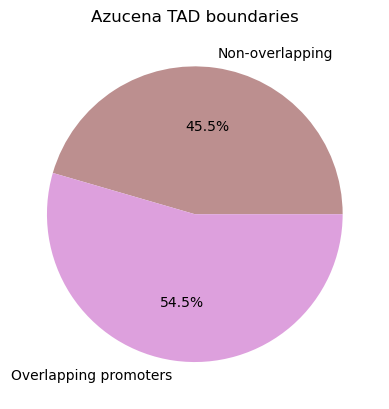

In [3]:
#plotting the percentage of promoter-boundaries in all boundaries
import matplotlib.pyplot as plt

# Example data
labels = ['Non-overlapping', 'Overlapping promoters']
sizes = [45.5, 54.5]

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ["rosybrown", "plum"])

# Add title
ax.set_title("Azucena TAD boundaries")

plt.savefig("/scratch/ak8725/figs/promoter-boundaries-pie-chart.png", dpi = 400)

# Show the plot
plt.show()

# How many genes are within NPB TAD boundaries (any overlap counts) - for Sonia, 2/5kb resolution

In [34]:
!head /scratch/ak8725/NPB_new/TADs_boundaries/NPB_boundaries_2kb_two_tools_80.bed

chr01	61000	63000
chr01	149000	151000
chr01	211000	213000
chr01	229000	231000
chr01	331000	333000
chr01	371000	373000
chr01	419000	421000
chr01	523000	525000
chr01	561000	563000
chr01	583000	585000


In [2]:
!head /scratch/ak8725/annotations/npb_genes6.bed

chr01	2983	10815	Os01g0100100	1	+
chr01	11218	12435	Os01g0100200	1	+
chr01	11372	12284	Os01g0100300	1	-
chr01	12721	15685	Os01g0100400	1	+
chr01	12808	13978	Os01g0100466	1	-
chr01	16399	20144	Os01g0100500	1	+
chr01	22841	26892	Os01g0100600	1	+
chr01	25861	26424	Os01g0100650	1	-
chr01	27143	28644	Os01g0100700	1	+
chr01	29818	34453	Os01g0100800	1	+


In [25]:
!awk '{print $1 "\t" $2 "\t" $3 "\t" $4}' "/scratch/ak8725/annotations/npb_genes6.bed" > "/scratch/ak8725/annotations/npb_genes4.bed"

In [26]:
!module load bedtools/intel/2.29.2

In [35]:
!bedtools intersect -a /scratch/ak8725/NPB_new/TADs_boundaries/NPB_boundaries_5kb_two_tools_80.bed -b /scratch/ak8725/annotations/npb_genes4.bed -wo > /scratch/ak8725/NPB_new/TADs_boundaries/genes_at_2kb_npb_boundaries.bed

/bin/bash: line 1: bedtools: command not found


In [36]:
!wc -l /scratch/ak8725/NPB_new/TADs_boundaries/genes_at_2kb_npb_boundaries.bed

3516 /scratch/ak8725/NPB_new/TADs_boundaries/genes_at_2kb_npb_boundaries.bed


In [37]:
!head /scratch/ak8725/NPB_new/TADs_boundaries/genes_at_2kb_npb_boundaries.bed

chr01	61000	63000	chr01	58658	61090	Os01g0101150	90
chr01	61000	63000	chr01	60091	61086	Os01g0101175	86
chr01	61000	63000	chr01	62060	65537	Os01g0101200	940
chr01	149000	151000	chr01	148085	150568	Os01g0102700	1568
chr01	211000	213000	chr01	209771	214173	Os01g0104100	2000
chr01	229000	231000	chr01	226897	229301	Os01g0104400	301
chr01	331000	333000	chr01	331382	332345	Os01g0106500	963
chr01	331000	333000	chr01	332667	333689	Os01g0106600	333
chr01	371000	373000	chr01	371831	374412	Os01g0106800	1169
chr01	371000	373000	chr01	335708	371194	Os01g0106700	194


In [38]:
!awk '{if($NF!=0) print $7}' /scratch/ak8725/NPB_new/TADs_boundaries/genes_at_2kb_npb_boundaries.bed > /scratch/ak8725/NPB_new/TADs_boundaries/gene_list_at_2kb_npb_boundaries.bed

In [39]:
!head /scratch/ak8725/NPB_new/TADs_boundaries/gene_list_at_2kb_npb_boundaries.bed

Os01g0101150
Os01g0101175
Os01g0101200
Os01g0102700
Os01g0104100
Os01g0104400
Os01g0106500
Os01g0106600
Os01g0106800
Os01g0106700


In [33]:
#how many unique genes
!cut -f 1 /scratch/ak8725/NPB_new/TADs_boundaries/gene_list_at_5kb_npb_boundaries.bed | sort -u | wc -l

1779
